In [1]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Changing default display options for better visibility of data
#pd.options.display.max_colwidth = 255
#pd.options.display.max_rows=225

In [3]:
# Importing the data for analysis
df_data = pd.read_csv('train.csv')

In [4]:
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Understand the data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Check the dimensions
df_data.shape

(1460, 81)

In [7]:
# To get the description of the dataset
df_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [8]:
#checking duplicates with respect to id column
sum(df_data.duplicated(subset = 'Id')) == 0

True

In [9]:
#Sum of null value
df_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
# Checking for percentage nulls
round(100*(df_data.isnull().sum()/len(df_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [11]:
# Removing id field
df_data.drop(['Id'], axis=1, inplace=True)

In [12]:
# Dropping Columns with more than 15 % missing values
df_data.drop(['Alley', 'LotFrontage','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


In [13]:
# Dropping rows for the NaN values instead of infusing data as the NaN prercentage of data is very less
df_data.dropna(axis='rows', inplace=True)

In [14]:
#Checking the data frame shape
print(df_data.shape)

(1338, 74)


In [15]:
# Checking for percentage of missing values per column
round(100*(df_data.isnull().sum()/len(df_data.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64

In [16]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (PropAge, PropRemoAge, GarageAge) from today
df_data['PropAge'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['PropRemoAge'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['GarageAge'] = pd.datetime.now().year - df_data['GarageYrBlt']

In [17]:
df_data = df_data.drop(['YearBuilt'], axis = 1)
df_data = df_data.drop(['YearRemodAdd'], axis = 1)
df_data = df_data.drop(['GarageYrBlt'], axis = 1)

In [18]:
df_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge,PropRemoAge,GarageAge
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,20,20,20.0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,181500,47,47,47.0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,22,21,22.0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,140000,108,53,25.0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,23,23,23.0


In [19]:
# Numeric columns
numeric_col = df_data.select_dtypes(exclude='object').columns
numeric_col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'PropAge', 'PropRemoAge', 'GarageAge'],
      dtype='object')

In [20]:
# Categorical columns
categorical_col = df_data.select_dtypes(include='object').columns
categorical_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [21]:
# outcome column
out_col = 'SalePrice'

### Outliner Treatment

In [22]:
# Function to Fix Outliners of Numerical column

Q1 = df_data[numeric_col].quantile(0.05)
Q3 = df_data[numeric_col].quantile(0.95)
IQR = Q3 - Q1
df_data = df_data[~((df_data[numeric_col] < (Q1 - 1.5 * IQR)) |(df_data[numeric_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
df_data.shape

(1188, 74)

In [24]:
def numeric_col_analysis(col_x):
    sns.jointplot(x = df_data[col_x], y = df_data[out_col])
    plt.show()

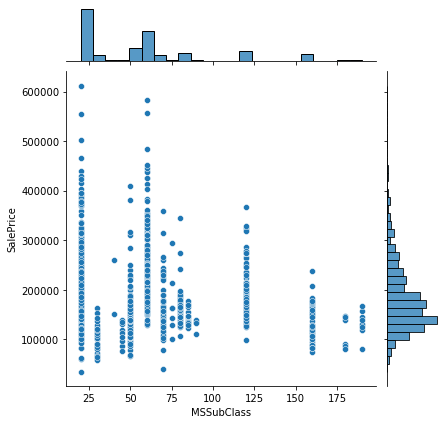

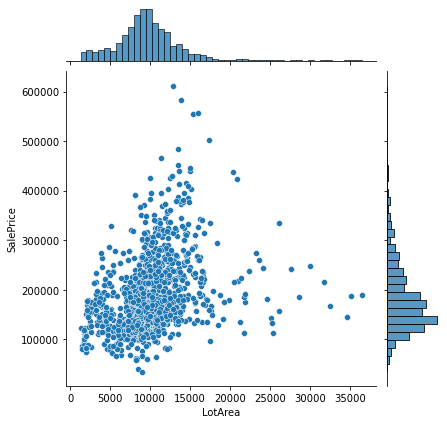

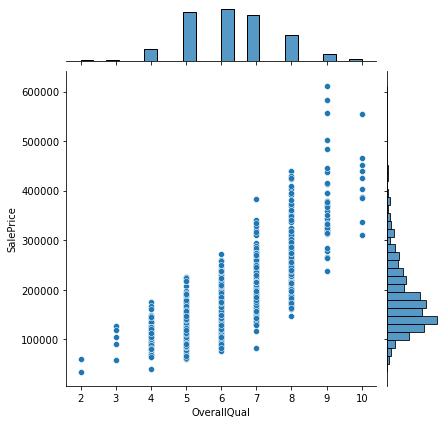

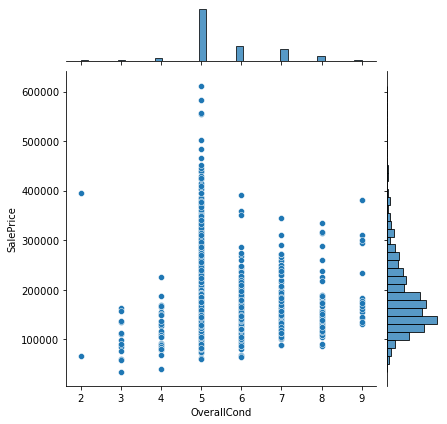

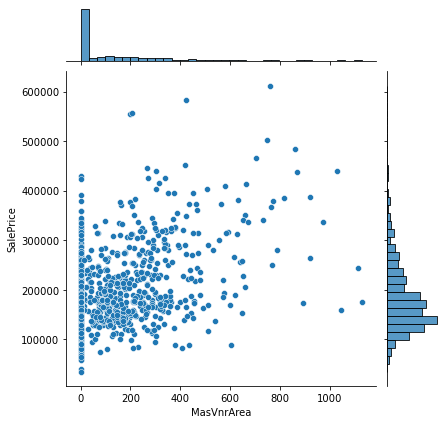

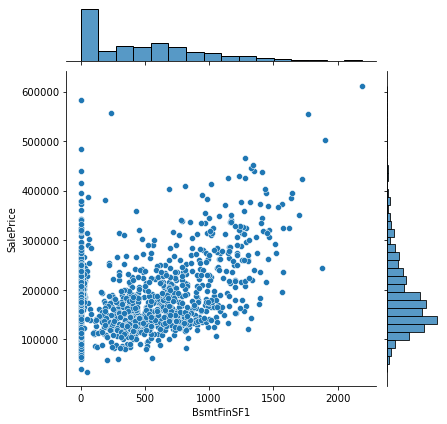

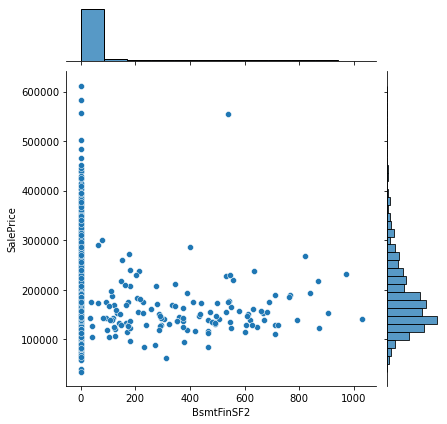

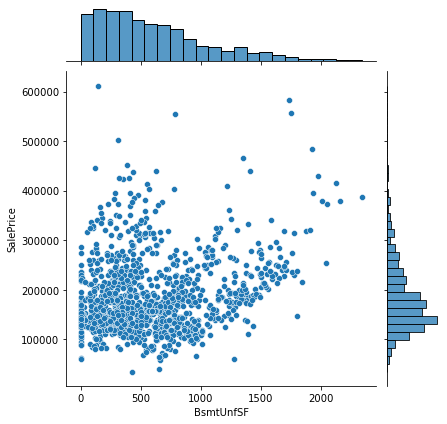

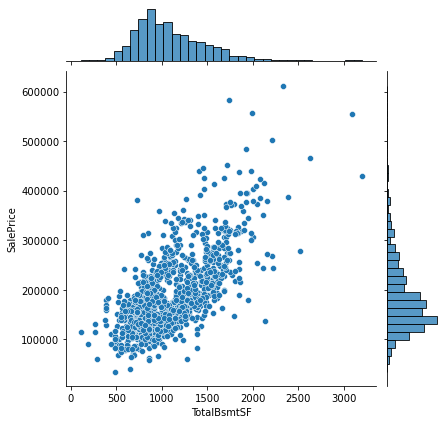

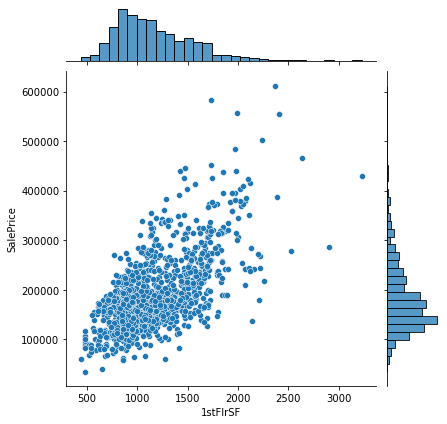

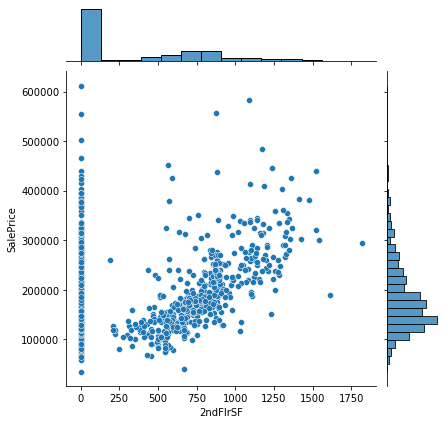

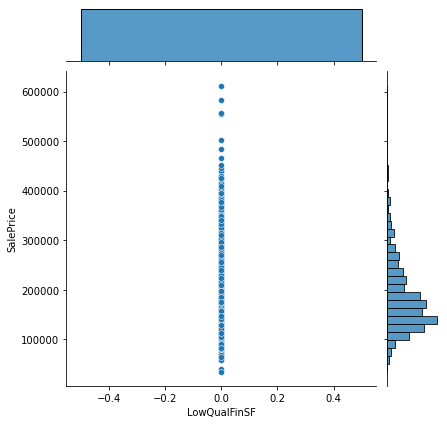

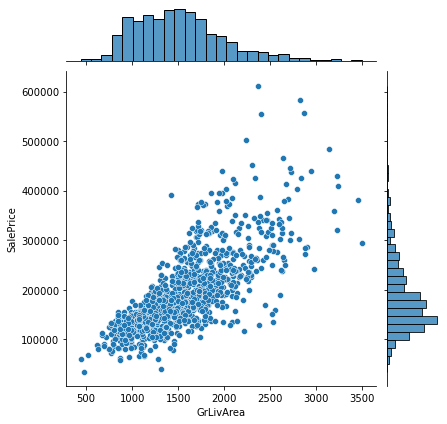

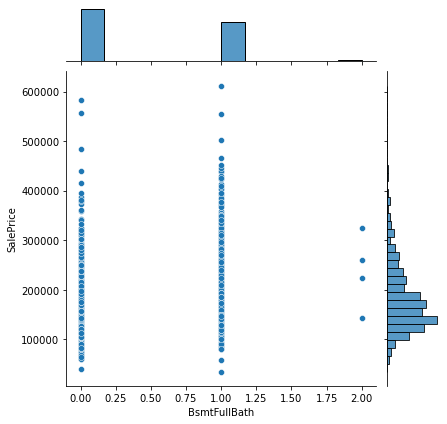

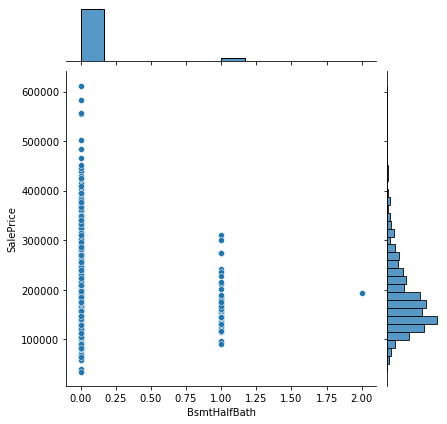

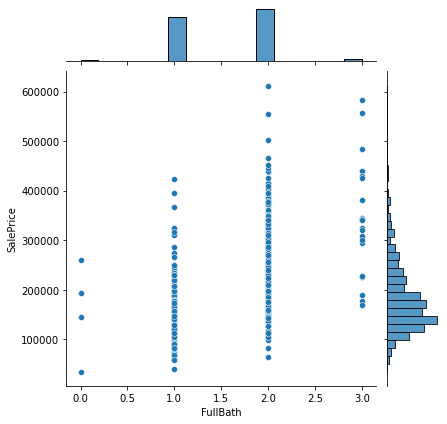

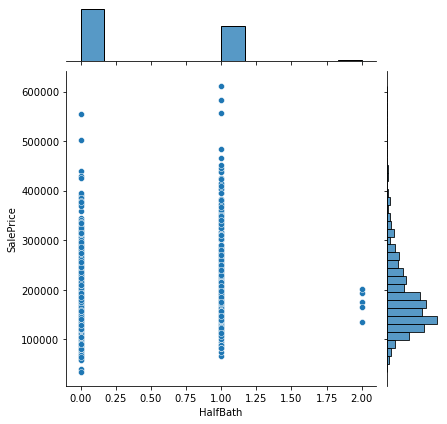

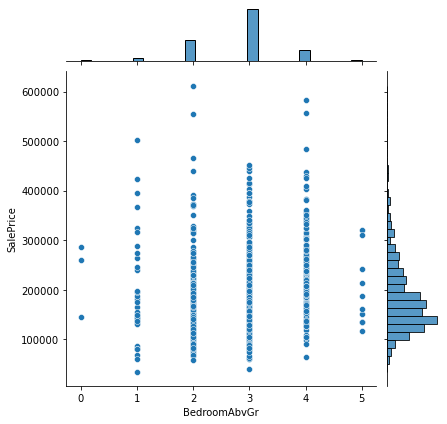

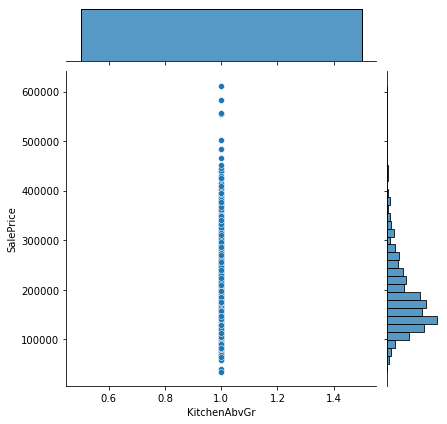

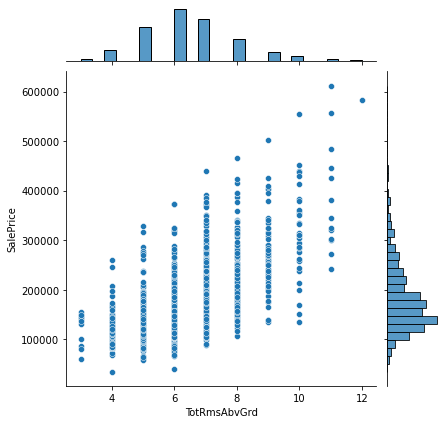

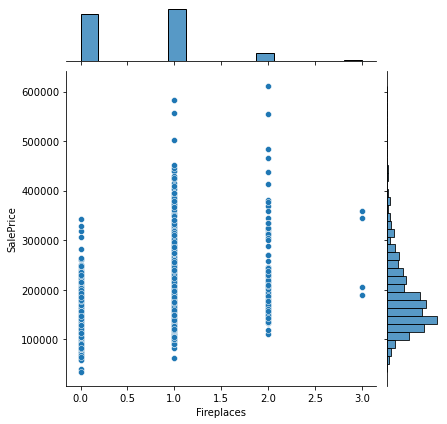

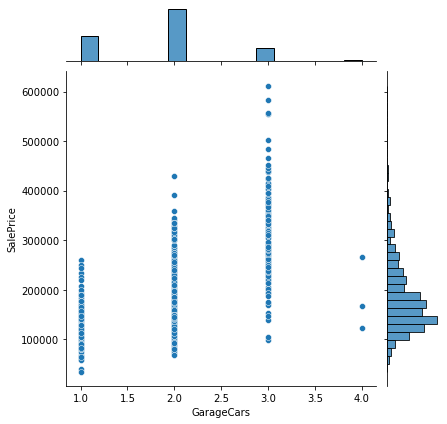

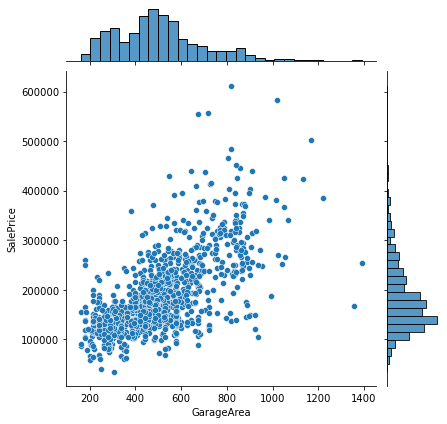

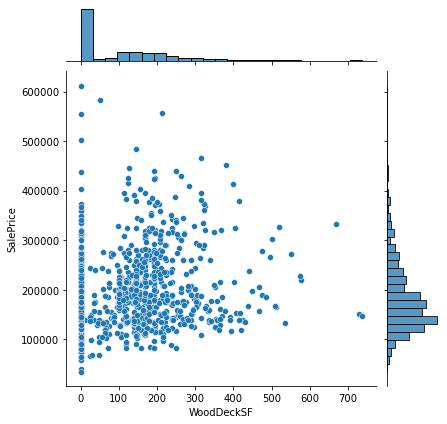

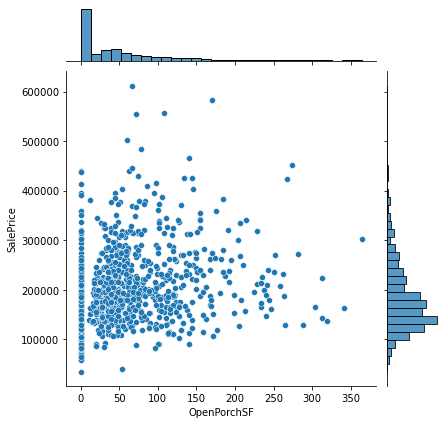

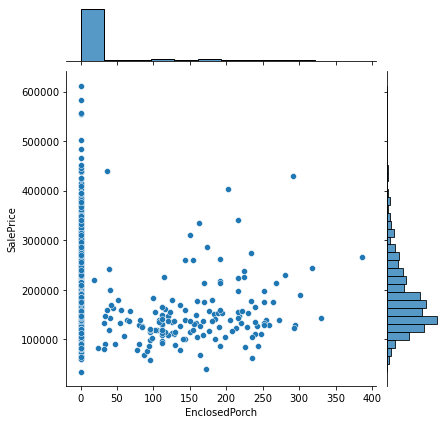

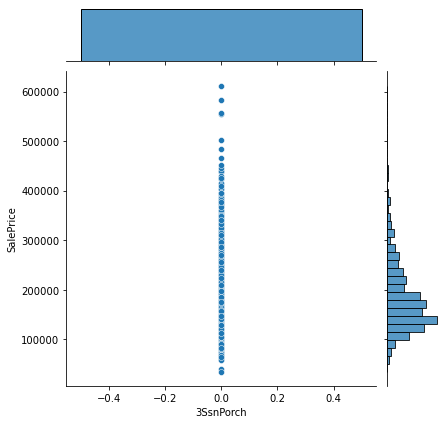

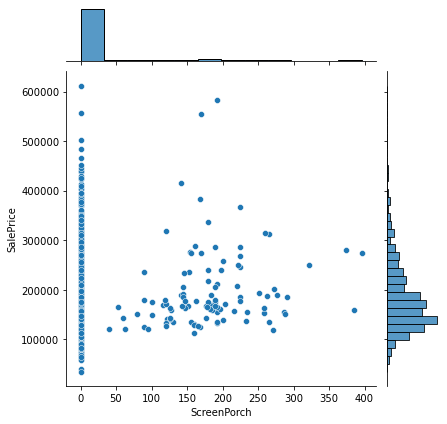

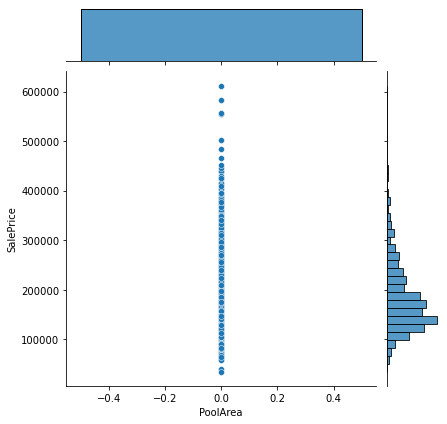

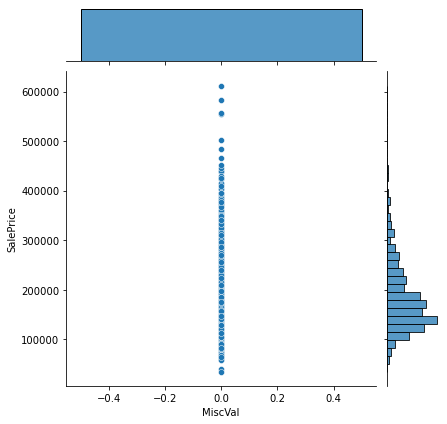

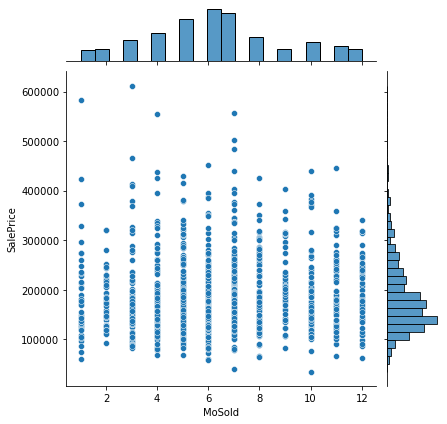

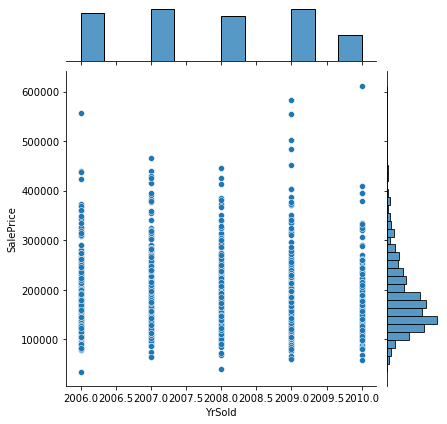

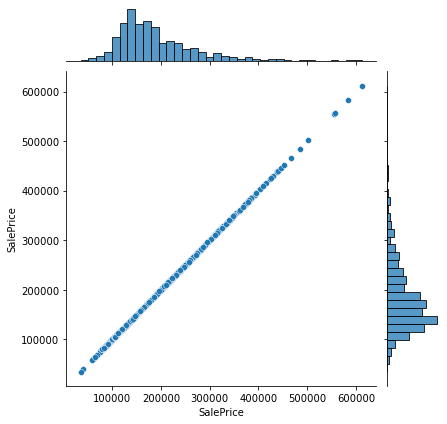

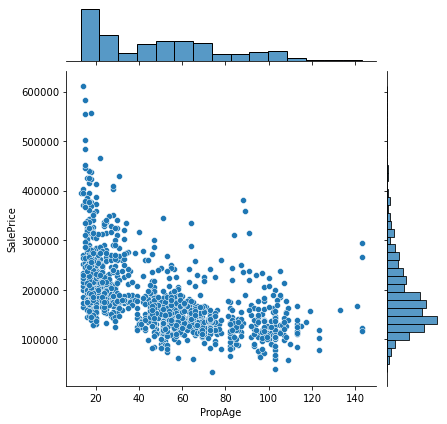

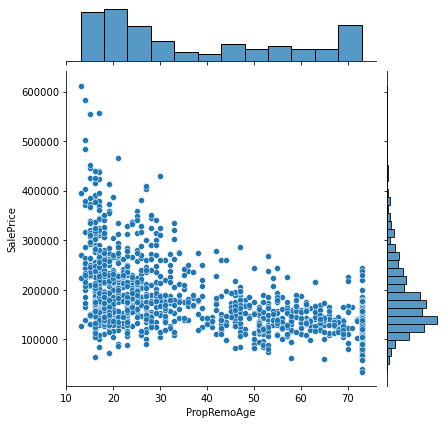

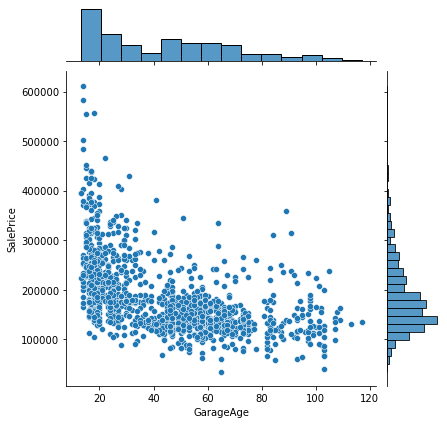

In [25]:
for i,col_x in enumerate(numeric_col):
    numeric_col_analysis(col_x)

#### Target variable 'SalePrice' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'Sawyer'),
  Text(6, 0, 'NridgHt'),
  Text(7, 0, 'NAmes'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'SawyerW'),
  Text(10, 0, 'IDOTRR'),
  Text(11, 0, 'MeadowV'),
  Text(12, 0, 'Timber'),
  Text(13, 0, 'Mitchel'),
  Text(14, 0, 'Gilbert'),
  Text(15, 0, 'StoneBr'),
  Text(16, 0, 'OldTown'),
  Text(17, 0, 'ClearCr'),
  Text(18, 0, 'Edwards'),
  Text(19, 0, 'NWAmes'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

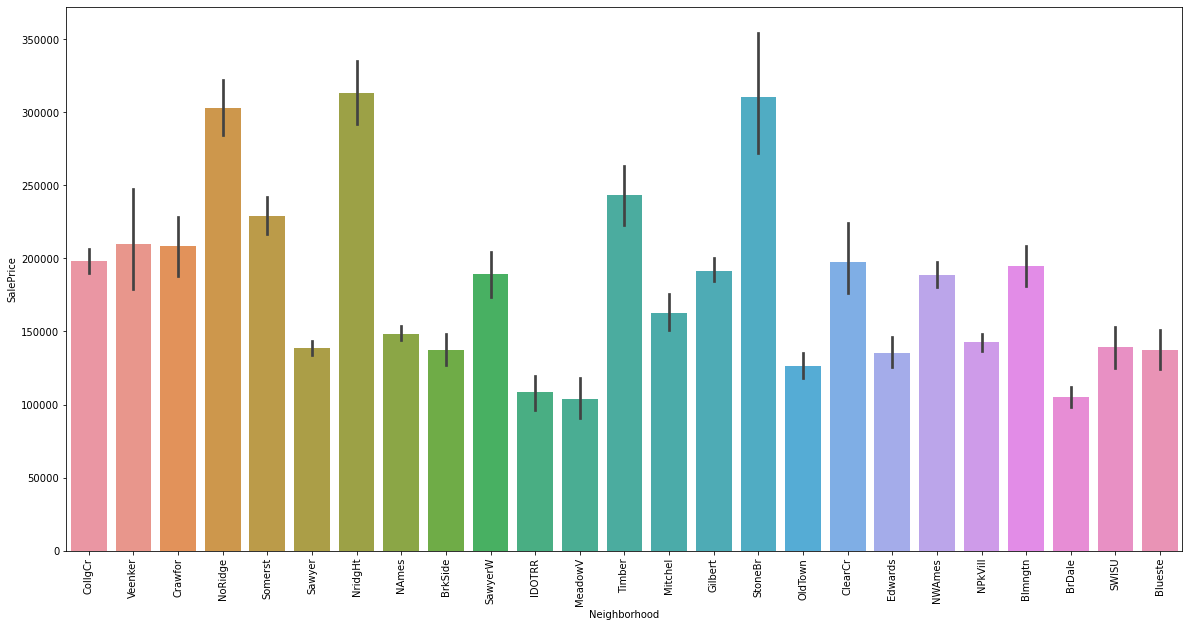

In [26]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 10))
sns.barplot(x="Neighborhood", y="SalePrice", data= df_data)
plt.xticks(rotation=90)

##### Findings : 
Properties in some of the Neighborhoods are high priced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

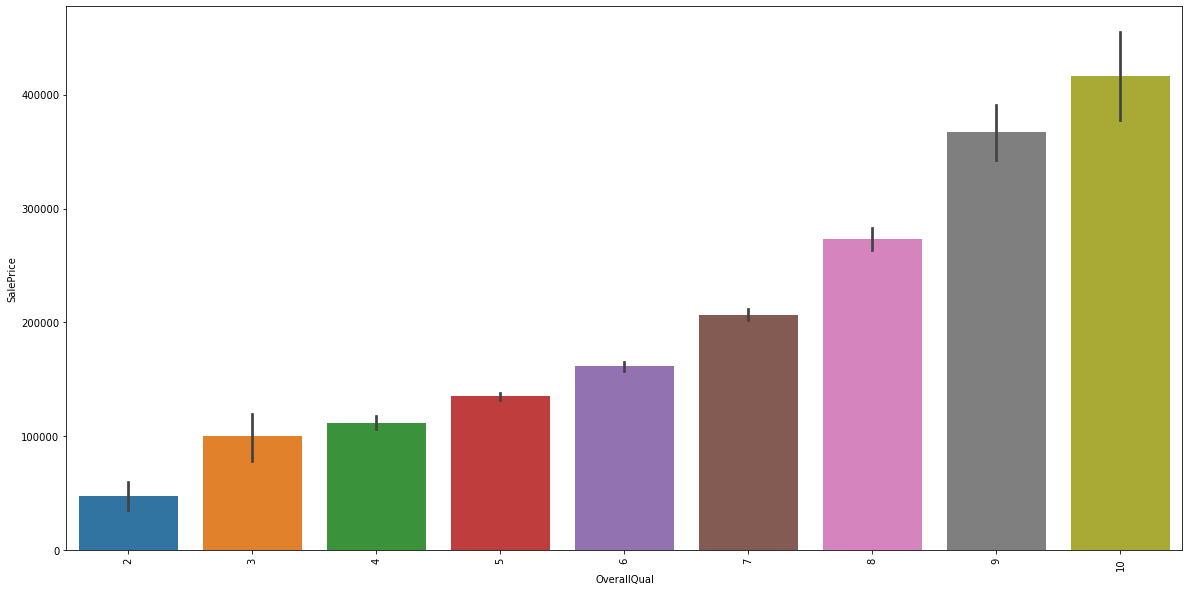

In [27]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 10))
sns.barplot(x="OverallQual", y="SalePrice", data= df_data)
plt.xticks(rotation=90)

##### Findings : 
Overall quality has direct impact on the property price

### Dummy Variable

In [28]:
# Get dummy variables for the feature 
# drop_first = true because n-1 dummies can expain n categories 
data=pd.get_dummies(df_data,drop_first=True)
data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# check the column names
data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

In [30]:
data.shape

(1188, 219)

In [31]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [32]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [33]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Rescaling the Features

In [34]:
# This step is to rescale variable so that they have a comparable scale

# Apply scaler() to all the columns except the 'yes-no/0-1' and 'dummy' variables

#Use Normalized scaler to scale
scaler = MinMaxScaler()
numeric_col = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'PropAge', 'PropRemoAge', 'GarageAge']
#Fit and transform training set only
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.fit_transform(X_test[numeric_col])

In [35]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1212,0.058824,0.228409,0.142857,0.571429,0.000000,0.180672,0.0,0.152346,0.197298,0.087907,...,0,0,0,0,1,0,0,0,1,0
1241,0.000000,0.242869,0.571429,0.571429,0.000000,0.000000,0.0,0.784487,0.613590,0.560930,...,0,0,1,0,0,0,0,0,0,1
282,0.588235,0.106903,0.571429,0.428571,0.147033,0.474790,0.0,0.190432,0.460090,0.386512,...,0,1,0,0,0,0,0,0,1,0
219,0.588235,0.048580,0.571429,0.428571,0.014172,0.008403,0.0,0.572225,0.433074,0.355814,...,0,0,1,0,0,0,0,0,0,1
612,0.235294,0.300710,0.714286,0.428571,0.095660,0.519958,0.0,0.143521,0.453950,0.379535,...,0,0,0,0,1,0,0,0,1,0


In [36]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1122,0.000000,0.268192,0.250,0.000000,0.0,0.000000,0.000000,0.287671,0.183199,0.187097,...,0,0,0,0,0,0,0,0,0,0
752,0.000000,0.279665,0.500,0.333333,0.0,0.548446,0.000000,0.119435,0.443942,0.378495,...,0,0,0,0,1,0,0,0,1,0
150,0.000000,0.321119,0.375,0.500000,0.0,0.327239,0.000000,0.108305,0.279160,0.190323,...,0,0,0,0,1,0,0,0,1,0
1028,0.176471,0.289141,0.375,0.333333,0.0,0.168190,0.045254,0.153682,0.214216,0.189964,...,0,0,0,0,1,0,0,0,1,0
512,0.000000,0.274632,0.375,0.333333,0.0,0.238117,0.192053,0.072346,0.245234,0.152688,...,0,0,0,0,1,0,0,0,1,0


## Model Building and Evaluation

In [37]:
### Build Linear Regression Model Automated Approach
lm = LinearRegression()
lm=lm.fit(X_train, y_train)

# Lets take top 25 features to build the model 
rfe = RFE(lm, n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Lets check the columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 107),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 9),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 141),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 106),
 ('HalfBath', False, 53),
 ('BedroomAbvGr', False, 17),
 ('KitchenAbvGr', False, 10),
 ('TotRmsAbvGrd', False, 20),
 ('Fireplaces', False, 161),
 ('GarageCars', False, 32),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 98),
 ('OpenPorchSF', False, 85),
 ('EnclosedPorch', False, 72),
 ('3SsnPorch', False, 8),
 ('ScreenPorch', False, 23),
 ('PoolArea', False, 13),
 ('MiscVal', False, 6),
 ('MoSold', False, 165),
 ('YrSold', False, 147),
 ('PropAge', True, 1),
 ('PropRemoAge', False, 38),
 ('GarageAge', False, 158),
 ('MSZoning_FV', False, 33),
 ('MSZoning_RH', False

In [39]:
# Columns selected by RFE
ref_columns = X_train.columns[rfe.support_]

In [40]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=168)

In [41]:
lm1=lm.fit(X_train, y_train)

In [42]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

2020664790180104.8
[-1.88045730e+04  4.56645067e+04  4.60114310e+04  3.75939960e+04
  7.28652858e+03 -2.15765347e+16 -1.16608478e+16 -2.43982559e+16
  2.76845979e+16  7.69675584e+15  5.76719705e+15 -2.35727904e+16
 -1.04783276e+16  1.50637500e+03 -4.65918750e+03  8.13356250e+03
 -5.52306250e+03 -2.30895000e+04 -9.05461273e+15  9.56650000e+03
 -7.58750000e+02  1.75408750e+04  1.66353750e+04  5.55950000e+03
  6.31550000e+03  9.94275000e+03  5.47024372e+15  1.67234375e+04
  1.08879824e+15  5.03209665e+15  2.96500000e+02 -1.40112500e+03
 -3.82090000e+04 -8.88600000e+03  1.05750000e+03  4.51805000e+04
  5.23138125e+04  3.46565000e+04  2.76300000e+04  2.96924375e+04
 -3.38081250e+03  5.35711719e+03  1.14325000e+03  4.05700000e+03
 -1.47621875e+04 -1.44850000e+03 -1.92480000e+04  1.92562500e+03
 -1.09794062e+04 -2.79059375e+03 -7.96500000e+02  9.29693750e+03
 -4.68963125e+04  2.49303125e+03  1.07716250e+04 -1.27500000e+03
 -1.22120625e+04 -9.44750000e+03  4.51612500e+03 -1.92357500e+04
 -9.18

In [43]:
#r2score,RSS and RMSE

y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score Train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score Test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss Train: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss Test: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mse Tain: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mse Test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 score Train:  0.9232447551023817
r2 score Test:  0.8860438050734298
rss Train:  332413091424.77515
rss Test:  260538151363.7571
Mse Tain:  400015753.82042736
Mse Test:  729798743.3158462


In [44]:
X_train1=X_train[ref_columns]
X_test1=X_test[ref_columns]

## Ridge 

In [45]:
# list of alphas to tune . Optimal value of alpha help us avoid underfitting and overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [46]:
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
#Best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 1.0}
-15546.062564474929


##### Findings : 
optimal alpha value is 1.0

In [48]:
#Fitting Ridge model for alpha = 1.0
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-1.93038454e+04,  2.54267374e+04,  6.70843013e+04,  3.69370540e+04,
        4.12390957e+04,  6.73788772e+03,  7.02687068e+03,  4.11712555e+04,
        6.60901922e+04,  5.33726880e+04,  7.79218700e+04,  4.39920999e+04,
       -5.32484989e+04, -3.99074852e+04,  2.41653735e+04,  2.39940777e+04,
        2.10119097e+04,  4.68232044e+04, -1.37479314e+04, -2.22182758e+04,
        2.76530212e+04, -1.16007081e+04, -8.87711012e+03,  1.58987599e+04,
       -1.72784172e+04, -3.53882326e+03, -2.91144720e+04, -3.84746064e+04,
        1.08940448e+04, -1.56440758e+03,  1.71623971e+04, -1.56440758e+03,
       -1.96317111e+04, -1.78108393e+04, -1.81290257e+04,  2.08734202e+04,
        1.31224021e+04,  1.18768788e+04,  2.34392231e+04, -2.16678489e+04,
        1.54150759e+04, -2.02319884e+03, -8.24029940e+02, -5.18571824e+01,
        1.07423363e+03,  3.09177015e+04,  3.34256604e+04,  1.18491532e+04,
        3.42382129e+04,  1.80556531e+04])

In [49]:
#r2score,RSS and RMSE

y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score Train: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score Test: ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss Train: ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss Test: ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mse Tain: ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mse Test: ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 score Train:  0.9211053485156285
r2 score Test:  0.891965558060447
rss Train:  341678474634.2969
rss Test:  246999242162.1609
Mse Tain:  411165432.7729204
Mse Test:  691874627.9052125


## Lasso 

In [50]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
#Best hyperparameter alpha
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-15691.5153480966


##### Findings : 
optimal alpha value for Lasso is 50

In [52]:
#Fitting Lasso model for alpha = 50

alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=50)

In [53]:
lasso.coef_

array([-19618.53822358,  21118.36692368,  69909.47185338,  36692.51484566,
        34544.464146  ,    598.62113314,     -0.        ,  42806.28313879,
         1488.50843367,      0.        , 177428.56681787,  41454.72442256,
       -54266.88484915, -33018.76329286,  23359.77248951,  22415.97572179,
        20357.67116933,  45866.49862337,  -3726.69841158,     -0.        ,
         8928.71583153,     -0.        ,      0.        ,   5760.44320325,
           -0.        ,     -0.        , -28927.45890796, -38240.63486538,
         6518.46288798,     -0.        ,  16743.54683158,     -0.        ,
       -19018.16051238, -16718.77865247,     -0.        ,  21424.19620038,
            0.        ,     -0.        ,   9792.8903451 , -32634.08128014,
         2194.33254502,     -0.        ,     -0.        ,     -0.        ,
            0.        ,  27389.37251421,  28921.78827974,      0.        ,
        21302.42960548,  17154.26307036])

In [54]:
#r2score,RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score Train: ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score Test: ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss Train: ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss Test: ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mse Tain: ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mse Test: ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 score Train:  0.9186033281527323
r2 score Test:  0.8863442984686024
rss Train:  352514272562.4708
rss Test:  259851133043.02676
Mse Tain:  424204900.79719716
Mse Test:  727874322.2493747


In [55]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.232448e-01,9.211053e-01,9.186033e-01
1,R2 Score (Test),8.860438e-01,8.919656e-01,8.863443e-01
2,RSS (Train),3.324131e+11,3.416785e+11,3.525143e+11
3,RSS (Test),2.605382e+11,2.469992e+11,2.598511e+11
4,MSE (Train),2.000039e+04,2.027721e+04,2.059624e+04
5,MSE (Test),2.701479e+04,2.630351e+04,2.697915e+04


## Model Evaluation

In [56]:
ridge_pred = ridge.predict(X_test1)

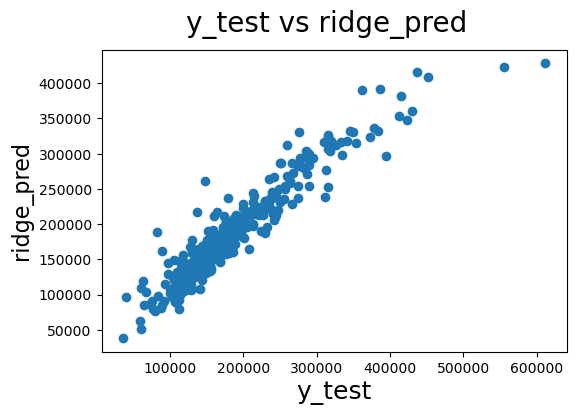

In [57]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

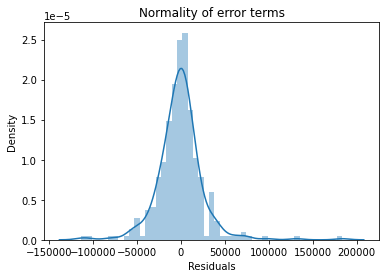

In [58]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms')
plt.xlabel("Residuals")
plt.show()

In [59]:
lasso_pred = lasso.predict(X_test1)

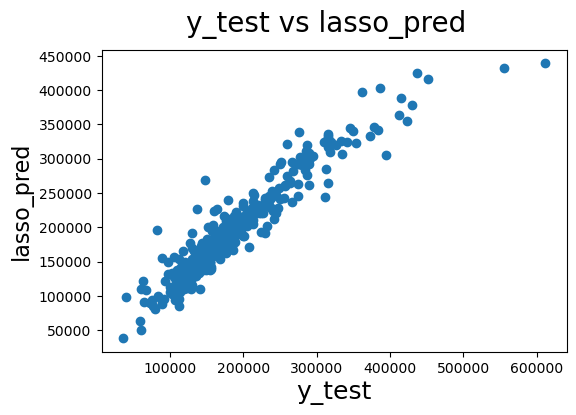

In [60]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

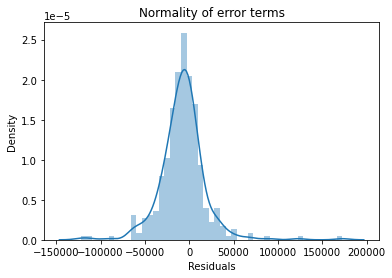

In [61]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms')
plt.xlabel("Residuals")
plt.show()

In [62]:
# Lets observe the changes in the coefficients after regularization

In [63]:
betas = pd.DataFrame(index=X_train1.columns)

In [64]:
betas.rows = X_train1.columns

In [65]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
pd.set_option('display.max_rows', None)
betas.head(60)

,Ridge,Lasso
MSSubClass,-19303.845371,-19618.538224
LotArea,25426.737378,21118.366924
OverallQual,67084.301343,69909.471853
OverallCond,36937.053996,36692.514846
BsmtFinSF1,41239.095681,34544.464146
BsmtFinSF2,6737.887722,598.621133
BsmtUnfSF,7026.870678,-0.000000
TotalBsmtSF,41171.255511,42806.283139
1stFlrSF,66090.192226,1488.508434
2ndFlrSF,53372.687984,0.000000


In [67]:
# Create a dataframe for Lasso Coefficients
model_parameters = list(lasso.coef_)
mod = list(zip(ref_columns, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,MSSubClass,-19618.538224
1,LotArea,21118.366924
2,OverallQual,69909.471853
3,OverallCond,36692.514846
4,BsmtFinSF1,34544.464146


In [68]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,MSSubClass,-19618.538224
1,LotArea,21118.366924
2,OverallQual,69909.471853
3,OverallCond,36692.514846
4,BsmtFinSF1,34544.464146
5,BsmtFinSF2,598.621133
7,TotalBsmtSF,42806.283139
8,1stFlrSF,1488.508434
10,GrLivArea,177428.566818
11,GarageArea,41454.724423


In [73]:
# Sorting the coefficients in ascending order
pred = pred.sort_values((['Coeff']), axis = 0, ascending = False)
pred

,Variable,Coeff
10,GrLivArea,177428.566818
2,OverallQual,69909.471853
17,Neighborhood_StoneBr,45866.498623
7,TotalBsmtSF,42806.283139
11,GarageArea,41454.724423
3,OverallCond,36692.514846
4,BsmtFinSF1,34544.464146
46,SaleType_Con,28921.788280
45,SaleType_CWD,27389.372514
14,Neighborhood_Crawfor,23359.772490


## Conclusion 

#### As per above models Ridge R2 in Test is slightly better than Lasso, However in Lasso Model insignificant features are being assigned to zero. Which will help us in finding less complex but similar efficiency .
    
#### It is always advisable to use simple yet robust model.

## Problem Statement - Part I

#### The company wants to know:

##### Which variables are significant in predicting the price of a house :
        Below are the variable which has posititve coefficient i.e. higher house price :
                    GrLivArea
                    OverallQual
                    Neighborhood_StoneBr
                    TotalBsmtSF
                    GarageArea
                    OverallCond
                    BsmtFinSF1
                    SaleType_Con
                    SaleType_CWD
                    Neighborhood_Crawfor
                    Neighborhood_NoRidge
          And below are the variable which has negative coefficient i.e. decrease on the house price :
                    PropAge
                    ExterQual_TA
                    LandSlope_Sev
                    GarageType_CarPort

##### How well those variables describe the price of a house.

In [70]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.232448e-01,9.211053e-01,9.186033e-01
1,R2 Score (Test),8.860438e-01,8.919656e-01,8.863443e-01
2,RSS (Train),3.324131e+11,3.416785e+11,3.525143e+11
3,RSS (Test),2.605382e+11,2.469992e+11,2.598511e+11
4,MSE (Train),2.000039e+04,2.027721e+04,2.059624e+04
5,MSE (Test),2.701479e+04,2.630351e+04,2.697915e+04


In [71]:
pd.set_option('display.max_rows', None)
betas.head(20)

,Ridge,Lasso
MSSubClass,-19303.845371,-19618.538224
LotArea,25426.737378,21118.366924
OverallQual,67084.301343,69909.471853
OverallCond,36937.053996,36692.514846
BsmtFinSF1,41239.095681,34544.464146
BsmtFinSF2,6737.887722,598.621133
BsmtUnfSF,7026.870678,-0.000000
TotalBsmtSF,41171.255511,42806.283139
1stFlrSF,66090.192226,1488.508434
2ndFlrSF,53372.687984,0.000000
